In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
import tensorflow as tf

In [4]:
df = pd.read_csv('Problem2 - Greenland.csv')

In [5]:
X = df[['PMF Factor 1','PMF Factor 2']]
y = df['PMF Factor 3']

In [6]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [8]:
model = keras.Sequential()
model.add(keras.layers.Dense(units = 64, activation = 'relu', input_shape=(X_train.shape[1],)))


model.add(keras.layers.Dense(units = 32, activation = 'relu'))
model.add(keras.layers.Dense(units = 1, activation = 'linear'))

model.compile(loss='mse', optimizer='rmsprop')

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                192       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,305
Trainable params: 2,305
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.fit(X_train, y_train, epochs=50, verbose=1)

Epoch 1/50
9/9 [==============================] - 1s 4ms/step - loss: 0.5344
Epoch 2/50
9/9 [==============================] - 0s 3ms/step - loss: 0.2048
Epoch 3/50
9/9 [==============================] - 0s 3ms/step - loss: 0.0856
Epoch 4/50
9/9 [==============================] - 0s 3ms/step - loss: 0.0596
Epoch 5/50
9/9 [==============================] - 0s 3ms/step - loss: 0.0501
Epoch 6/50
9/9 [==============================] - 0s 3ms/step - loss: 0.0430
Epoch 7/50
9/9 [==============================] - 0s 3ms/step - loss: 0.0372
Epoch 8/50
9/9 [==============================] - 0s 3ms/step - loss: 0.0353
Epoch 9/50
9/9 [==============================] - 0s 2ms/step - loss: 0.0343
Epoch 10/50
9/9 [==============================] - 0s 3ms/step - loss: 0.0336
Epoch 11/50
9/9 [==============================] - 0s 3ms/step - loss: 0.0333
Epoch 12/50
9/9 [==============================] - 0s 3ms/step - loss: 0.0331
Epoch 13/50
9/9 [==============================] - 0s 3ms/step - loss: 0.

In [11]:
y_predicted_test = model.predict(X_test)

3/3 [==============================] - 0s 4ms/step


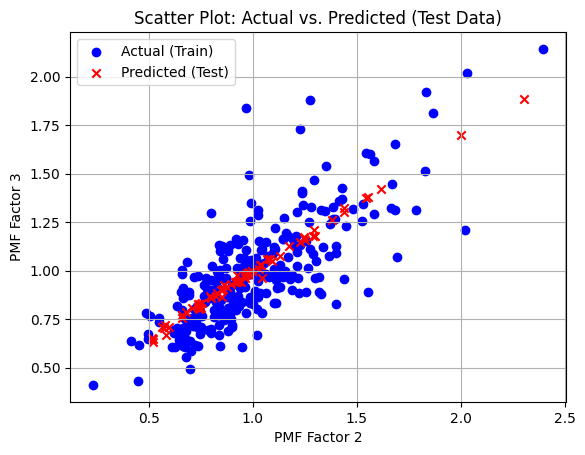

In [19]:
plt.scatter(X_train['PMF Factor 2'], y_train, label='Actual (Train)', color='blue')
plt.scatter(X_test['PMF Factor 2'], y_predicted_test, label='Predicted (Test)', color='red', marker='x')
plt.xlabel('PMF Factor 2')
plt.ylabel('PMF Factor 3')
plt.title('Scatter Plot: Actual vs. Predicted (Test Data)')
plt.legend()
plt.grid()
plt.show()